In [1]:
import seaborn as sns; sns.set()
sns.set(color_codes=True)
sns.set(font_scale=1.2)


import utilities
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, jaccard_score, hamming_loss, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ParameterSampler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline, make_union
from sklearn.decomposition import PCA
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

# CLASSIFIERS
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

#REGRESSORS
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor


from scipy.spatial.distance import cdist, pdist
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn import (manifold, decomposition, ensemble,
                     discriminant_analysis, random_projection)

import statistics
#plt.style.use('seaborn')

import numpy as np
import tensorflow as tf

from scipy.linalg import lu
from scipy.linalg import solve

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


SEED = 3
import os
import random as rn

os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
rn.seed(SEED)

name_prefix = 'expanded'


In [2]:
# Data preparation
def data_preparation():
    
    MXene = MXene.strip()
    MXene = MXene.replace(' ', '')
    elements = MXene.split('2', 1)
    M = elements[0]
    X = elements[1][0]
    T = elements[1][1:]
    print(M, X, T)

In [3]:
# Evaluation
def multi_output_score(test, pred):
    true = 0
    for i in range(len(test)):
        if test[i]==pred[i]:
            true = true + 1
    return true/len(test)

In [4]:
# load data from csv file
def load_data(filename='data.csv'):
    X_df = pd.read_csv(filename)
    X_df = X_df.fillna(0)
    return X_df

In [5]:
def evaluation(true, pred):
    index_abs = 0
    jaccard_score_list = []
    hamming_score_list = []
    f1_score_list = []
    precision_score_list = []
    recall_score_list = []
    pred = pred.tolist()
    for row in true:
        single_score = jaccard_score(row, pred[index_abs], average='micro')
        hammung_score = hamming_loss(row, pred[index_abs])
        recall = recall_score(row, pred[index_abs], average='micro')
        precision = precision_score(row, pred[index_abs], average='micro')
        f1 = f1_score(row, pred[index_abs], average='micro')
        jaccard_score_list.append(single_score)
        hamming_score_list.append(hammung_score)
        precision_score_list.append(precision)
        recall_score_list.append(recall)
        f1_score_list.append(f1)
        index_abs = index_abs + 1
    return jaccard_score_list, hamming_score_list, f1_score_list, precision_score_list, recall_score_list


## Load data and preprocess

In [6]:
import pandas as pd

X_df = load_data('Gold_dataset/Au_nanoparticle_expanded.csv')

X_features = X_df.drop(['ID','T','tau','time','Total_E','E_atomic','E_formation','Probability','Population'], axis=1)


In [7]:
# TODO: 5 cases 
feature_set_surface = ['N_surface', 'S_100', 'S_111', 'S_110', 'S_311', 'Curve_1-10', 'Curve_11-20', 'Curve_21-30', 'Curve_31-40', 'Curve_41-50', 'Curve_51-60', 'Curve_61-70', 'Curve_71-80', 'Avg_surf', 'SCN_1', 'SCN_2', 'SCN_3', 'SCN_4', 'SCN_5', 'SCN_6', 'SCN_7', 'SCN_8', 'SCN_9', 'SCN_10', 'SCN_11', 'SCN_12', 'SCN_13', 'SCN_14', 'SCN_15', 'q6q6_S0', 'q6q6_S1', 'q6q6_S2', 'q6q6_S3', 'q6q6_S4', 'q6q6_S5', 'q6q6_S6', 'q6q6_S7', 'q6q6_S8', 'q6q6_S9', 'q6q6_S10', 'q6q6_S11', 'q6q6_S12', 'q6q6_S13']
feature_set_total = ['N_total', 'Volume', 'R_min', 'R_max', 'R_diff', 'R_avg', 'R_std', 'R_skew', 'R_kurt', 'Avg_total', 'TCN_1', 'TCN_2', 'TCN_3', 'TCN_4', 'TCN_5', 'TCN_6', 'TCN_7', 'TCN_8', 'TCN_9', 'TCN_10', 'TCN_11', 'TCN_12', 'TCN_13', 'TCN_14', 'TCN_15', 'TCN_16', 'TCN_17', 'Avg_bonds', 'Std_bonds', 'Max_bonds', 'Min_bonds', 'N_bonds', 'angle_avg', 'angle_std', 'q6q6_avg_total', 'q6q6_avg_bulk', 'q6q6_avg_surf', 'q6q6_T0', 'q6q6_T1', 'q6q6_T2', 'q6q6_T3', 'q6q6_T4', 'q6q6_T5', 'q6q6_T6', 'q6q6_T7', 'q6q6_T8', 'q6q6_T9', 'q6q6_T10', 'q6q6_T11', 'q6q6_T12', 'q6q6_T13', 'q6q6_T14', 'q6q6_T15']
feature_set_condensed = ['N_total', 'N_bulk', 'N_surface', 'Volume', 'R_min', 'R_max', 'R_diff', 'R_avg', 'R_std', 'R_skew', 'R_kurt', 'S_100', 'S_111', 'S_110', 'S_311', 'Curve_1-10', 'Curve_11-20', 'Curve_21-30', 'Curve_31-40', 'Curve_41-50', 'Curve_51-60', 'Curve_61-70', 'Curve_71-80', 'Avg_bulk', 'Avg_total', 'Avg_surf', 'TCN_1', 'TCN_2', 'TCN_3', 'TCN_4', 'TCN_5', 'TCN_6', 'TCN_7', 'TCN_8', 'TCN_9', 'TCN_10', 'TCN_11', 'TCN_12', 'TCN_13', 'TCN_14', 'TCN_15', 'TCN_16', 'TCN_17', 'BCN_5', 'BCN_6', 'BCN_7', 'BCN_8', 'BCN_9', 'BCN_10', 'BCN_11', 'BCN_12', 'BCN_13', 'BCN_14', 'BCN_15', 'BCN_16', 'BCN_17', 'SCN_1', 'SCN_2', 'SCN_3', 'SCN_4', 'SCN_5', 'SCN_6', 'SCN_7', 'SCN_8', 'SCN_9', 'SCN_10', 'SCN_11', 'SCN_12', 'SCN_13', 'SCN_14', 'SCN_15', 'Avg_bonds', 'Std_bonds', 'Max_bonds', 'Min_bonds', 'N_bonds', 'angle_avg', 'angle_std', 'FCC', 'HCP', 'ICOS', 'DECA','q6q6_avg_total', 'q6q6_avg_bulk', 'q6q6_avg_surf', 'q6q6_T0', 'q6q6_T1', 'q6q6_T2', 'q6q6_T3', 'q6q6_T4', 'q6q6_T5', 'q6q6_T6', 'q6q6_T7', 'q6q6_T8', 'q6q6_T9', 'q6q6_T10', 'q6q6_T11', 'q6q6_T12', 'q6q6_T13', 'q6q6_T14', 'q6q6_T15',  'q6q6_B0', 'q6q6_B1', 'q6q6_B2', 'q6q6_B3', 'q6q6_B4', 'q6q6_B5', 'q6q6_B6', 'q6q6_B7', 'q6q6_B8', 'q6q6_B9', 'q6q6_B10', 'q6q6_B11', 'q6q6_B12', 'q6q6_B13', 'q6q6_B14', 'q6q6_B15', 'q6q6_S0', 'q6q6_S1', 'q6q6_S2', 'q6q6_S3', 'q6q6_S4', 'q6q6_S5', 'q6q6_S6', 'q6q6_S7', 'q6q6_S8', 'q6q6_S9', 'q6q6_S10', 'q6q6_S11', 'q6q6_S12', 'q6q6_S13']
feature_set_bulk = ['N_bulk', 'Avg_bulk', 'BCN_5', 'BCN_6', 'BCN_7', 'BCN_8', 'BCN_9', 'BCN_10', 'BCN_11', 'BCN_12', 'BCN_13', 'BCN_14', 'BCN_15', 'BCN_16', 'BCN_17', 'FCC', 'HCP', 'ICOS', 'DECA', 'q6q6_B0', 'q6q6_B1', 'q6q6_B2', 'q6q6_B3', 'q6q6_B4', 'q6q6_B5', 'q6q6_B6', 'q6q6_B7', 'q6q6_B8', 'q6q6_B9', 'q6q6_B10', 'q6q6_B11', 'q6q6_B12', 'q6q6_B13', 'q6q6_B14', 'q6q6_B15']

feature_set_expanded = ['N_total','N_bulk','N_surface','Volume','R_min','R_max','R_diff','R_avg','R_std','R_skew',
                 'R_kurt','S_100','S_111','S_110','S_311','Curve_1','Curve_2','Curve_3','Curve_4','Curve_5','Curve_6',
                 'Curve_7','Curve_8','Curve_9','Curve_10','Curve_11','Curve_12','Curve_13','Curve_14','Curve_15',
                 'Curve_16','Curve_17','Curve_18','Curve_19','Curve_20','Curve_21','Curve_22','Curve_23','Curve_24',
                 'Curve_25','Curve_26','Curve_27','Curve_28','Curve_29','Curve_30','Curve_31','Curve_32','Curve_33',
                 'Curve_34','Curve_35','Curve_36','Curve_37','Curve_38','Curve_39','Curve_40','Curve_41','Curve_42',
                 'Curve_43','Curve_44','Curve_45','Curve_46','Curve_47','Curve_48','Curve_49','Curve_50','Curve_51',
                 'Curve_52','Curve_53','Curve_54','Curve_55','Curve_56','Curve_57','Curve_58','Curve_59','Curve_60',
                 'Curve_61','Curve_62','Curve_63','Curve_64','Curve_65','Curve_66','Curve_67','Curve_68','Curve_69',
                 'Curve_70','Curve_71','Curve_72','Curve_73','Curve_74','Curve_75','Curve_76','Curve_77','Curve_78',
                 'Curve_79','Curve_80','Avg_total','Avg_bulk','Avg_surf','Avg_surfo','TCN_1','TCN_2','TCN_3','TCN_4',
                 'TCN_5','TCN_6','TCN_7','TCN_8','TCN_9','TCN_10','TCN_11','TCN_12','TCN_13','TCN_14','TCN_15','TCN_16',
                 'TCN_17','BCN_5','BCN_6','BCN_7','BCN_8','BCN_9','BCN_10','BCN_11','BCN_12','BCN_13','BCN_14','BCN_15',
                 'BCN_16','BCN_17','SCN_1','SCN_2','SCN_3','SCN_4','SCN_5','SCN_6','SCN_7','SCN_8','SCN_9','SCN_10',
                 'SCN_11','SCN_12','SCN_13','SCN_14','SCN_15','SCNO_0','SCNO_1','SCNO_2','SCNO_3','SCNO_4','SCNO_5',
                 'SCNO_6','SCNO_7','SCNO_8','SCNO_9','SCNO_10','SCNO_11','SCNO_12','SCNO_13','Avg_bonds','Std_bonds',
                 'Max_bonds','Min_bonds','N_bonds','angle_avg','angle_std','FCC','HCP','ICOS','DECA','q6q6_avg_total',
                 'q6q6_avg_bulk','q6q6_avg_surf','q6q6_T0','q6q6_T1','q6q6_T2','q6q6_T3','q6q6_T4','q6q6_T5','q6q6_T6',
                 'q6q6_T7','q6q6_T8','q6q6_T9','q6q6_T10','q6q6_T11','q6q6_T12','q6q6_T13','q6q6_T14','q6q6_T15',
                 'q6q6_B0','q6q6_B1','q6q6_B2','q6q6_B3','q6q6_B4','q6q6_B5','q6q6_B6','q6q6_B7','q6q6_B8','q6q6_B9',
                 'q6q6_B10','q6q6_B11','q6q6_B12','q6q6_B13','q6q6_B14','q6q6_B15','q6q6_S0','q6q6_S1','q6q6_S2','q6q6_S3',
                 'q6q6_S4','q6q6_S5','q6q6_S6','q6q6_S7','q6q6_S8','q6q6_S9','q6q6_S10','q6q6_S11','q6q6_S12','q6q6_S13']


In [8]:
name_prefix = 'expanded'
X_features = X_df[feature_set_expanded] 
feature_names = X_features.columns.values

y_label = X_df['E_formation']
y_label
# label_names = y_label.columns.values

0       3.754355e+02
1       4.176566e+02
2       8.932440e+02
3       1.315569e+03
4       1.817819e+03
            ...     
3996    8.798248e+02
3997    9.862301e+02
3998    1.110559e+03
3999    1.400583e+03
4000    3.684436e+06
Name: E_formation, Length: 4001, dtype: float64

In [9]:
print('Feature names: \n', feature_names)

Feature names: 
 ['N_total' 'N_bulk' 'N_surface' 'Volume' 'R_min' 'R_max' 'R_diff' 'R_avg'
 'R_std' 'R_skew' 'R_kurt' 'S_100' 'S_111' 'S_110' 'S_311' 'Curve_1'
 'Curve_2' 'Curve_3' 'Curve_4' 'Curve_5' 'Curve_6' 'Curve_7' 'Curve_8'
 'Curve_9' 'Curve_10' 'Curve_11' 'Curve_12' 'Curve_13' 'Curve_14'
 'Curve_15' 'Curve_16' 'Curve_17' 'Curve_18' 'Curve_19' 'Curve_20'
 'Curve_21' 'Curve_22' 'Curve_23' 'Curve_24' 'Curve_25' 'Curve_26'
 'Curve_27' 'Curve_28' 'Curve_29' 'Curve_30' 'Curve_31' 'Curve_32'
 'Curve_33' 'Curve_34' 'Curve_35' 'Curve_36' 'Curve_37' 'Curve_38'
 'Curve_39' 'Curve_40' 'Curve_41' 'Curve_42' 'Curve_43' 'Curve_44'
 'Curve_45' 'Curve_46' 'Curve_47' 'Curve_48' 'Curve_49' 'Curve_50'
 'Curve_51' 'Curve_52' 'Curve_53' 'Curve_54' 'Curve_55' 'Curve_56'
 'Curve_57' 'Curve_58' 'Curve_59' 'Curve_60' 'Curve_61' 'Curve_62'
 'Curve_63' 'Curve_64' 'Curve_65' 'Curve_66' 'Curve_67' 'Curve_68'
 'Curve_69' 'Curve_70' 'Curve_71' 'Curve_72' 'Curve_73' 'Curve_74'
 'Curve_75' 'Curve_76' 'Curve_77'

<Figure size 360x360 with 0 Axes>

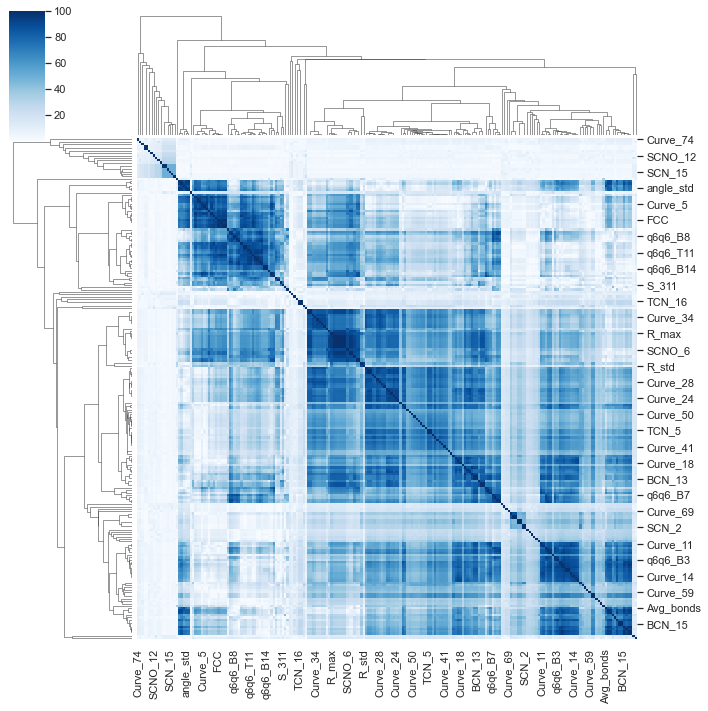

,N_total,N_bulk,N_surface,Volume,R_min,R_max,R_diff,R_avg,R_std,R_skew,...,q6q6_S4,q6q6_S5,q6q6_S6,q6q6_S7,q6q6_S8,q6q6_S9,q6q6_S10,q6q6_S11,q6q6_S12,q6q6_S13
N_total,100.000000,99.948823,99.644339,99.999782,93.231540,95.035552,57.911730,99.918745,44.733184,12.970548,...,56.014770,56.798566,57.849844,61.011407,58.795196,49.591577,55.154101,45.071010,46.076280,17.154265
N_bulk,99.948823,100.000000,99.353759,99.949109,93.930260,94.370600,56.311637,99.821014,43.164072,12.338212,...,55.619717,56.254452,57.396769,60.572643,58.780137,49.397915,54.476979,44.226051,45.230376,17.010774
N_surface,99.644339,99.353759,100.000000,99.643882,90.821636,96.382595,62.059008,99.690345,48.905641,14.312144,...,57.173019,58.373849,59.188769,62.220326,58.983827,50.315718,57.164062,47.408804,48.438563,17.502129
Volume,99.999782,99.949109,99.643882,100.000000,93.232858,95.033450,57.908405,99.918716,44.731073,12.960151,...,56.017312,56.799829,57.850591,61.012284,58.800019,49.596832,55.154929,45.066417,46.069189,17.156330
R_min,93.231540,93.930260,90.821636,93.232858,100.000000,81.828211,33.867912,92.505709,21.619149,14.294508,...,41.699832,43.670076,47.298776,52.739588,50.342431,42.940811,45.282636,37.074454,37.256999,14.785810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
q6q6_S9,49.591577,49.397915,50.315718,49.596832,42.940811,46.555409,28.626638,49.225878,40.213679,4.757473,...,43.821348,58.547732,73.547387,87.114714,88.830329,100.000000,85.663357,53.944514,47.983448,14.214175
q6q6_S10,55.154101,54.476979,57.164062,55.154929,45.282636,51.933317,31.523896,54.371064,35.793041,5.254782,...,57.401044,75.977625,89.015839,92.052091,85.980537,85.663357,100.000000,78.511505,70.278624,19.114544
q6q6_S11,45.071010,44.226051,47.408804,45.066417,37.074454,39.890720,18.243233,43.668517,16.002466,0.719026,...,50.594037,70.846294,83.179180,78.643144,66.218135,53.944514,78.511505,100.000000,82.022322,19.149085
q6q6_S12,46.076280,45.230376,48.438563,46.069189,37.256999,42.735595,24.926628,44.900255,18.958673,2.515134,...,49.576370,64.255536,73.023539,68.610697,58.982688,47.983448,70.278624,82.022322,100.000000,22.924052


In [27]:
# Correlation Coefficient Filter

sns.set()
correlated = X_features.corr(method='spearman').abs().mul(100).astype(float)
plt.figure(figsize=(5,5))
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=50, as_cmap=True)
cg = sns.clustermap(data = correlated, cmap='Blues', metric='correlation')
#cg = sns.clustermap(data = correlated, cmap='Blues', metric='correlation', annot =False, fmt='1g')
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

plt.savefig('./Gold/expanded/correlation_matrix_{}.png'.format(name_prefix), dpi=300, bbox_inches='tight')
plt.show()
correlated




In [38]:
# print correlated features
for c1 in feature_names:
  for c2 in feature_names:
    if c1 != c2 and correlated[c1][c2] > 95:
        print(c1, c2)

N_total N_bulk
N_total N_surface
N_total Volume
N_total R_max
N_total R_avg
N_total TCN_12
N_total BCN_12
N_total N_bonds
N_bulk N_total
N_bulk N_surface
N_bulk Volume
N_bulk R_avg
N_bulk TCN_12
N_bulk BCN_12
N_bulk N_bonds
N_surface N_total
N_surface N_bulk
N_surface Volume
N_surface R_max
N_surface R_avg
N_surface TCN_12
N_surface BCN_12
N_surface N_bonds
Volume N_total
Volume N_bulk
Volume N_surface
Volume R_max
Volume R_avg
Volume TCN_12
Volume BCN_12
Volume N_bonds
R_max N_total
R_max N_surface
R_max Volume
R_max R_avg
R_avg N_total
R_avg N_bulk
R_avg N_surface
R_avg Volume
R_avg R_max
R_avg TCN_12
R_avg BCN_12
R_avg N_bonds
Curve_3 Curve_4
Curve_4 Curve_3
TCN_1 SCN_1
TCN_2 SCN_2
TCN_3 SCN_3
TCN_4 SCN_4
TCN_5 SCN_5
TCN_6 SCN_6
TCN_7 SCN_7
TCN_8 SCN_8
TCN_9 SCN_9
TCN_10 SCN_10
TCN_12 N_total
TCN_12 N_bulk
TCN_12 N_surface
TCN_12 Volume
TCN_12 R_avg
TCN_12 BCN_12
TCN_12 N_bonds
TCN_13 BCN_13
TCN_14 BCN_14
TCN_15 BCN_15
TCN_16 BCN_16
TCN_17 BCN_17
BCN_12 N_total
BCN_12 N_bulk
BCN_12 

In [14]:
# data processing

from sklearn import preprocessing

X_scaled = preprocessing.StandardScaler().fit_transform(X_features)

y_label = np.array(y_label).reshape(-1,1)
y_scaled = preprocessing.StandardScaler().fit_transform(y_label)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [25]:
# Build base model

base_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

base_model.compile(loss='mse', optimizer='adam', metrics=['mae'])

history = base_model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1, validation_data=(X_test, y_test), shuffle=True)

# tf.keras.models.save_model(base_model, './Gold/base_model_{}.h5'.format(name_prefix))

print("Model saved!")

Epoch 1/200
320/320 [==============================] - 1s 1ms/step - loss: 0.0910 - mae: 0.0557 - val_loss: 0.0205 - val_mae: 0.0610
Epoch 2/200
320/320 [==============================] - 0s 722us/step - loss: 8.4557 - mae: 0.1094 - val_loss: 0.0194 - val_mae: 0.0784
Epoch 3/200
320/320 [==============================] - 0s 709us/step - loss: 5.4018 - mae: 0.0980 - val_loss: 0.0155 - val_mae: 0.0411
Epoch 4/200
320/320 [==============================] - 0s 707us/step - loss: 1.9188 - mae: 0.0772 - val_loss: 0.0162 - val_mae: 0.0493
Epoch 5/200
320/320 [==============================] - 0s 708us/step - loss: 1.0901 - mae: 0.0629 - val_loss: 0.0154 - val_mae: 0.0423
Epoch 6/200
320/320 [==============================] - 0s 692us/step - loss: 1.5383 - mae: 0.0665 - val_loss: 0.0173 - val_mae: 0.0595
Epoch 7/200
320/320 [==============================] - 0s 689us/step - loss: 4.1857 - mae: 0.0948 - val_loss: 0.0167 - val_mae: 0.0613
Epoch 8/200
320/320 [==============================] - 0s

320/320 [==============================] - 0s 669us/step - loss: 3.5210 - mae: 0.0822 - val_loss: 0.0134 - val_mae: 0.0548
Epoch 122/200
320/320 [==============================] - 0s 713us/step - loss: 4.4944 - mae: 0.0867 - val_loss: 0.0143 - val_mae: 0.0506
Epoch 123/200
320/320 [==============================] - 0s 661us/step - loss: 4.5976 - mae: 0.0869 - val_loss: 0.0136 - val_mae: 0.0576
Epoch 124/200
320/320 [==============================] - 0s 660us/step - loss: 4.7123 - mae: 0.0865 - val_loss: 0.0140 - val_mae: 0.0482
Epoch 125/200
320/320 [==============================] - 0s 700us/step - loss: 4.0276 - mae: 0.0825 - val_loss: 0.0129 - val_mae: 0.0501
Epoch 126/200
320/320 [==============================] - 0s 838us/step - loss: 3.2268 - mae: 0.0772 - val_loss: 0.0138 - val_mae: 0.0470
Epoch 127/200
320/320 [==============================] - 0s 706us/step - loss: 3.3109 - mae: 0.0752 - val_loss: 0.0137 - val_mae: 0.0597
Epoch 128/200
320/320 [==============================] 

Epoch 181/200
320/320 [==============================] - 0s 680us/step - loss: 3.4135 - mae: 0.0768 - val_loss: 0.0126 - val_mae: 0.0460
Epoch 182/200
320/320 [==============================] - 0s 703us/step - loss: 2.8624 - mae: 0.0721 - val_loss: 0.0122 - val_mae: 0.0551
Epoch 183/200
320/320 [==============================] - 0s 656us/step - loss: 3.8752 - mae: 0.0821 - val_loss: 0.0114 - val_mae: 0.0341
Epoch 184/200
320/320 [==============================] - 0s 681us/step - loss: 5.3561 - mae: 0.0899 - val_loss: 0.0120 - val_mae: 0.0523
Epoch 185/200
320/320 [==============================] - 0s 690us/step - loss: 5.5163 - mae: 0.0930 - val_loss: 0.0131 - val_mae: 0.0521
Epoch 186/200
320/320 [==============================] - 0s 688us/step - loss: 4.3552 - mae: 0.0821 - val_loss: 0.0118 - val_mae: 0.0506
Epoch 187/200
320/320 [==============================] - 0s 702us/step - loss: 3.7169 - mae: 0.0822 - val_loss: 0.0111 - val_mae: 0.0331
Epoch 188/200
320/320 [==================

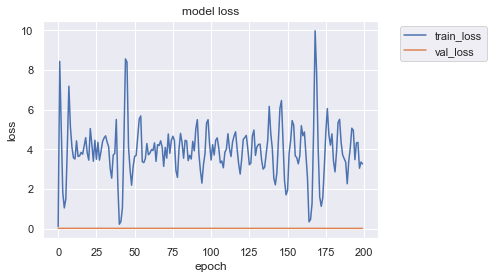

In [16]:
import matplotlib.pyplot as plt

# plot training curve
plt.plot(history.history['loss'])
# plt.plot(history.history['mae'])
plt.plot(history.history['val_loss'])
# plt.plot(history.history['val_mae'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left', bbox_to_anchor=(1.05, 1))
plt.savefig('./Gold/base_model_{}_loss_learning_curve.png'.format(name_prefix), dpi = 300, bbox_inches='tight')
plt.show()

In [15]:
import utilities

stop_call_back = utilities.EarlyStoppingByLossVal(monitor='mae', value=0.025, verbose=0)

base_model = tf.keras.models.load_model('./Gold/base_model_{}.h5'.format(name_prefix))

base_model.trainable = False

feature_model = utilities.Feature_Importance_Layer.make_feature_model(base_model, shape=(35))

opt = utilities.tf.keras.optimizers.Adam()

feature_model.compile(loss='mse', optimizer=opt, metrics=['mae'], run_eagerly=True)

history = feature_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_data=(X_test, y_test), shuffle=True, callbacks=[stop_call_back])


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 35)]              0         
_________________________________________________________________
feature_extractor (Sequentia (None, 35)                35        
_________________________________________________________________
sequential_1 (Sequential)    (10, 1)                   36        
Total params: 71
Trainable params: 35
Non-trainable params: 36
_________________________________________________________________
Epoch 1/100
320/320 [==============================] - 2s 7ms/step - loss: 0.5210 - mae: 0.4994 - val_loss: 0.2794 - val_mae: 0.3557
Epoch 2/100
320/320 [==============================] - 2s 7ms/step - loss: 0.1808 - mae: 0.2766 - val_loss: 0.1615 - val_mae: 0.2479
Epoch 3/100
320/320 [==============================] - 2s 7ms/step - loss: 0.1220 - mae: 0.2143 - val_loss: 0.1242 - val_mae: 0.

Epoch 57/100
320/320 [==============================] - 2s 7ms/step - loss: 0.0267 - mae: 0.1170 - val_loss: 0.0279 - val_mae: 0.1176
Epoch 58/100
320/320 [==============================] - 2s 7ms/step - loss: 0.0266 - mae: 0.1166 - val_loss: 0.0279 - val_mae: 0.1183
Epoch 59/100
320/320 [==============================] - 2s 7ms/step - loss: 0.0267 - mae: 0.1170 - val_loss: 0.0278 - val_mae: 0.1185
Epoch 60/100
320/320 [==============================] - 2s 7ms/step - loss: 0.0266 - mae: 0.1164 - val_loss: 0.0277 - val_mae: 0.1182
Epoch 61/100
320/320 [==============================] - 2s 7ms/step - loss: 0.0266 - mae: 0.1165 - val_loss: 0.0277 - val_mae: 0.1189
Epoch 62/100
320/320 [==============================] - 2s 8ms/step - loss: 0.0264 - mae: 0.1165 - val_loss: 0.0276 - val_mae: 0.1185
Epoch 63/100
320/320 [==============================] - 3s 8ms/step - loss: 0.0265 - mae: 0.1158 - val_loss: 0.0277 - val_mae: 0.1197
Epoch 64/100
320/320 [==============================] - 3s 8ms

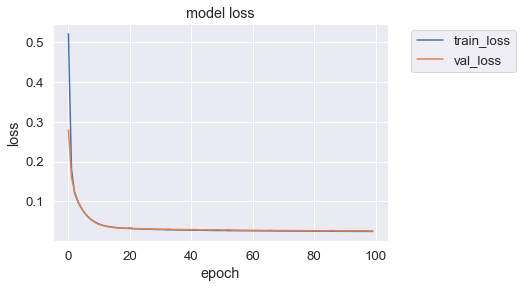

In [16]:
# plot training curve
plt.plot(history.history['loss'])
# plt.plot(history.history['mae'])
plt.plot(history.history['val_loss'])
# plt.plot(history.history['val_mae'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left', bbox_to_anchor=(1.05, 1))
plt.savefig('./Gold/feature_model_{}_loss_learning_curve.png'.format(name_prefix), dpi = 300, bbox_inches='tight')
plt.show()

In [10]:
from copy import copy
import numpy as np
from numpy import arange

from scipy.spatial.distance import cdist,pdist
from scipy.stats import levene, pearsonr

from pandas import Series, DataFrame

from matplotlib import cm
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D




def plot_feature_importance(ft_set, feature_importance, show_cols = 30):
    
    fig = plt.figure(figsize=(5,4))
    w_lr_sort, ft_sorted, _ = return_feature_importance(ft_set, feature_importance, show_cols = show_cols)
    x_val = list(range(len(w_lr_sort)))
    
    for i in range(16):
        plt.text(-0.3+i, 2, ft_sorted[i], rotation=90, fontsize=12)


    plt.bar(x_val, w_lr_sort)
    plt.ylabel('Ranking', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(x_val)
    
    return fig

def plot_feature_importance_reverse(ft_set, feature_importance, show_cols = 30):
    
    fig = plt.figure(figsize=(5,4))
    w_lr_sort, ft_sorted, _ = return_feature_importance(ft_set, feature_importance, show_cols = show_cols)
    x_val = list(range(len(w_lr_sort)))
    
    for i in range(16):
        plt.text(-0.3+i, 2, ft_sorted[i], rotation=90, fontsize=12)

    plt.bar(x_val, w_lr_sort, color='r')
    plt.ylabel('Ranking', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(x_val)
    
    return fig

def return_feature_importance(ft_set, feature_importance, show_cols = 30):

    w_lr = copy(np.abs(feature_importance))
    w_lr = 100 * (w_lr / w_lr.max())
    sorted_index_pos = [index for index, num in sorted(enumerate(w_lr), key=lambda x: x[-1], 
                   reverse=True)]

    ft_sorted = []
    w_lr_sort = []
    for i, idx in enumerate(sorted_index_pos):
        if i > show_cols:
            break
        ft_sorted.append(ft_set[idx])
        w_lr_sort.append(w_lr[idx])

    return w_lr_sort, ft_sorted, sorted_index_pos





In [11]:
weights = np.load('gold_weights_output_expanded.npy')

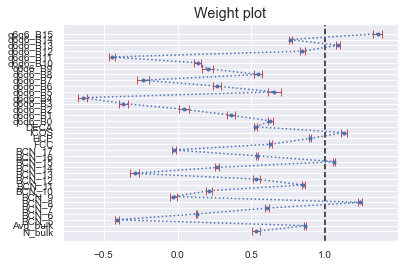

In [29]:
x = feature_names
y = weights_mean
fig, ax = plt.subplots(nrows=1, sharex=True)
ax.errorbar(y, x, xerr=weights_std, fmt='.:', elinewidth=1, capsize=4, color='b', ecolor='r')
ax.set_title('Weight plot')
# ax.set_yticklabels(labels, fontsize=8)
ax.tick_params(axis='both', labelsize=10)
ax.axvline(1, color="k", linestyle="--")
# ax.set_xlabel('weight')
# ax.set_facecolor("none")
# ax.grid(b=False)
fig.savefig('./Gold/{}_weight_plot.png'.format(name_prefix), dpi = 300, bbox_inches='tight')

In [38]:
a = []
for i in range(50):
    weights_mean = np.abs(np.subtract(weights[:i], 1)).mean(axis=0)
    a.append(utilities.rank_importance(feature_names, weights_mean))

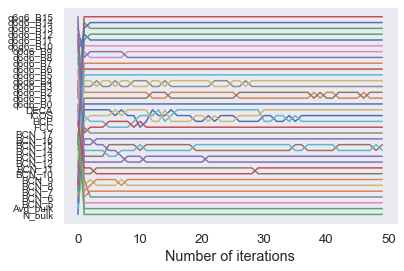

In [40]:
from matplotlib import pyplot as plt
a = np.array(a)
# print(a)
b = [i for i in range(50)]
for i in range(35):
    plt.plot(b, a[:,i])
plt.yticks([i for i in range(1,36)], feature_names, fontsize=10)
plt.xlabel("Number of iterations")
plt.grid(b=None)

plt.savefig('./Gold/{}_training_interation_converge.png'.format(name_prefix), dpi = 300, bbox_inches='tight')

In [12]:
weights_std = np.std(weights, axis=0)
weights_std

array([0.03217001, 0.03233074, 0.03159137, 0.03150257, 0.05241716,
       0.05378521, 0.04812135, 0.05214555, 0.05385539, 0.04357461,
       0.03550362, 0.03117791, 0.0424706 , 0.03393522, 0.02661944,
       0.02913346, 0.03652285, 0.04148681, 0.04067539, 0.04025146,
       0.03650163, 0.03615068, 0.03648378, 0.03445835, 0.03365674,
       0.03425048, 0.03079585, 0.03206627, 0.03201989, 0.03153218,
       0.02939965, 0.02908816, 0.02907417, 0.03249813, 0.03050628,
       0.02985554, 0.02873701, 0.02875715, 0.02862398, 0.02847141,
       0.02929054, 0.03112082, 0.03041236, 0.03124729, 0.03019667,
       0.03003665, 0.03022172, 0.02904174, 0.03019182, 0.03136471,
       0.02886392, 0.0296121 , 0.02900139, 0.02930821, 0.03116444,
       0.02995297, 0.0292927 , 0.03015655, 0.03171845, 0.03230868,
       0.02985573, 0.03087303, 0.03034267, 0.02882953, 0.03168866,
       0.02998699, 0.03020379, 0.0306448 , 0.03131377, 0.03075759,
       0.03089265, 0.03033058, 0.03120133, 0.02996098, 0.02919

In [13]:
weights_mean = weights.mean(axis=0)
weights_mean

array([ 0.05150738, -0.0438502 , -0.079367  ,  0.05505893,  0.11287921,
       -0.12281315,  0.10655537,  0.11830122, -0.12066101,  0.09605427,
       -0.00447517,  0.06625559, -0.10399702, -0.08325253, -0.07026647,
       -0.07205739, -0.07959215, -0.09601744,  0.09660395,  0.09563445,
       -0.09215452, -0.09095728, -0.09218989,  0.08699945,  0.08263855,
        0.08004615, -0.07793935, -0.07595744,  0.07870756,  0.07512399,
        0.04875205, -0.07511944,  0.07558321,  0.07454944,  0.07415738,
       -0.07186575, -0.07199246,  0.06826527, -0.06966788, -0.06459977,
       -0.06596432, -0.06818535,  0.06860057, -0.07036196,  0.06981122,
        0.06858532,  0.06570049,  0.06811281, -0.03041887, -0.06656782,
        0.05840114, -0.06294162,  0.05597077, -0.05353066,  0.0515603 ,
       -0.04621652,  0.04700701, -0.04250697, -0.04255005, -0.0417606 ,
       -0.04376958,  0.0391057 ,  0.04312497, -0.04572023, -0.03217207,
        0.03986535, -0.03196644,  0.04627109,  0.03017609,  0.04

In [14]:
weights_scaled = np.abs(np.subtract(weights, 1)).mean(axis=0)
weights_scaled

array([0.9484923 , 1.0438504 , 1.079367  , 0.9449409 , 0.88712084,
       1.1228129 , 0.8934446 , 0.8816986 , 1.1206611 , 0.9039459 ,
       1.004475  , 0.9337445 , 1.103997  , 1.0832527 , 1.0702664 ,
       1.0720572 , 1.0795918 , 1.0960169 , 0.9033963 , 0.9043658 ,
       1.0921545 , 1.0909575 , 1.0921894 , 0.9130005 , 0.9173617 ,
       0.9199535 , 1.0779395 , 1.0759578 , 0.9212925 , 0.92487615,
       0.95124817, 1.0751194 , 0.9244168 , 0.9254504 , 0.9258428 ,
       1.0718662 , 1.0719928 , 0.93173456, 1.0696676 , 1.0645995 ,
       1.0659639 , 1.0681856 , 0.93139946, 1.0703623 , 0.93018895,
       0.9314147 , 0.93429965, 0.93188745, 1.0304188 , 1.0665683 ,
       0.941599  , 1.0629417 , 0.9440293 , 1.0535306 , 0.94843966,
       1.0462165 , 0.95299274, 1.0425069 , 1.0425498 , 1.0417607 ,
       1.0437696 , 0.9608943 , 0.9568751 , 1.0457201 , 1.0321718 ,
       0.9601348 , 1.0319668 , 0.9537289 , 0.969824  , 0.9575056 ,
       0.95680004, 0.95397186, 1.0405543 , 1.0446869 , 1.03962

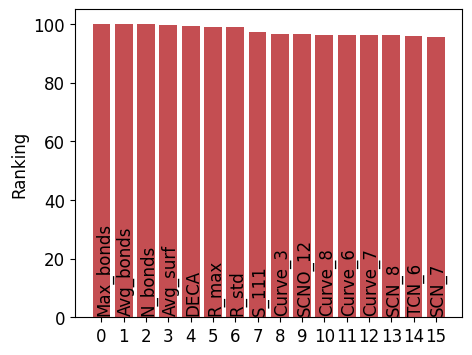

In [15]:
plt.style.use('default')

fig_FI_Weight_unimportant = plot_feature_importance_reverse(feature_names, weights_scaled, 15)
fig_FI_Weight_unimportant.savefig('./New_figures/expanded/{}_hist_TV_only.png'.format(name_prefix), dpi = 300, bbox_inches='tight')


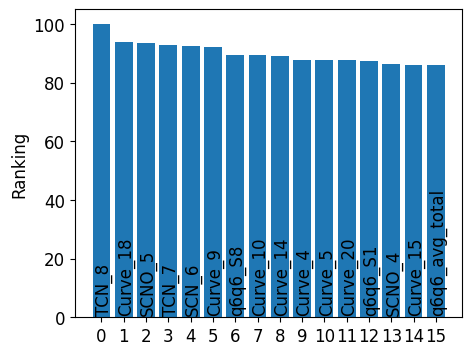

In [16]:
fig_FI_VT = plot_feature_importance(feature_names, np.abs((weights_mean)/(weights_std*weights_scaled)), 15)
fig_FI_VT.savefig('./New_figures/expanded/{}_hist_VT.png'.format(name_prefix), dpi = 300, bbox_inches='tight')

In [46]:
base_model = tf.keras.models.load_model('./Gold/base_model_expanded.h5')

base_model.trainable = False

In [47]:
# Benchmark
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = base_model.evaluate(X_train, y_train, batch_size=10)
print("test loss, test acc:", results)

Evaluate on test data
320/320 [==============================] - 0s 540us/step - loss: 3.7378 - mae: 0.0853
test loss, test acc: [3.7377889156341553, 0.08533189445734024]


In [48]:
# Baseline
array_aux = np.zeros(np.shape(X_train))
results = base_model.evaluate(array_aux, y_train, batch_size=10)

320/320 [==============================] - 0s 558us/step - loss: 1.2502 - mae: 0.0419


In [49]:
# Individula contribution
single_contribution_set = []
for i in range(len(X_train[-1])):
    aux_array = []
    array_aux = np.zeros(np.shape(X_train))
    array_aux[:, i] = X_train[:, i]
    results = base_model.evaluate(array_aux, y_train, batch_size=10)
    
    aux_array.append(results[0])
    aux_array.append(results[1])
    single_contribution_set.append(aux_array)

320/320 [==============================] - 0s 694us/step - loss: 1.3530 - mae: 0.0434


320/320 [==============================] - 0s 577us/step - loss: 1.4505 - mae: 0.0459


In [50]:
# All contribution
# Set each feature to be 0 and calculate the drop of change as its contribution
# it is different from permutation method, providing permutation method results
contribution_set = []
for i in range(len(X_train[-1])):
    aux_array = []
    array_aux = np.ones(np.shape(X_train))
    array_aux[:,i] = 0
    X_new = array_aux * X_train
    results_new = base_model.evaluate(X_new, y_train, batch_size=10)
    aux_array.append(results_new[0])
    aux_array.append(results_new[1])
    contribution_set.append(aux_array)

320/320 [==============================] - 0s 623us/step - loss: 3.9138 - mae: 0.0869


320/320 [==============================] - 0s 762us/step - loss: 4.0784 - mae: 0.0885


In [51]:
# Individual contribution of each single feature
# Compare this with permutation method
# Can be used to calculate feature interaction
contribution_set = np.round(contribution_set, 4)
for i in range(len(contribution_set)):
    contribution_set[i] = abs(contribution_set[i][0]-1.2502)
contribution_set

array([[2.2245, 2.2245],
       [2.6813, 2.6813],
       [2.7497, 2.7497],
       [2.1541, 2.1541],
       [1.9542, 1.9542],
       [2.9315, 2.9315],
       [2.4432, 2.4432],
       [1.8462, 1.8462],
       [2.8166, 2.8166],
       [2.2439, 2.2439],
       [2.8424, 2.8424],
       [2.1642, 2.1642],
       [2.7169, 2.7169],
       [2.9371, 2.9371],
       [2.9746, 2.9746],
       [2.9439, 2.9439],
       [2.5026, 2.5026],
       [3.0286, 3.0286],
       [2.2895, 2.2895],
       [2.0092, 2.0092],
       [3.1128, 3.1128],
       [3.1359, 3.1359],
       [3.1695, 3.1695],
       [2.3097, 2.3097],
       [1.9143, 1.9143],
       [2.1809, 2.1809],
       [3.0636, 3.0636],
       [2.7283, 2.7283],
       [1.8543, 1.8543],
       [2.1077, 2.1077],
       [2.4824, 2.4824],
       [2.6795, 2.6795],
       [1.8232, 1.8232],
       [2.3115, 2.3115],
       [2.2134, 2.2134],
       [2.7734, 2.7734],
       [2.7734, 2.7734],
       [2.409 , 2.409 ],
       [2.7099, 2.7099],
       [2.8899, 2.8899],


In [52]:
# We find the contribution and coefficient relationship through previous method (benchmark)
weights_output = np.zeros(np.shape(weights))
X_data = []
y_data = []
contribution_set = np.round(contribution_set, 4)
for j in range(len(weights)):
    for i in range(len(X_train[-1])):
        array_aux = np.ones(np.shape(X_train))
        array_aux[:,i] = 1-weights[j][i]
#         banchmark
        con_feature = contribution_set[i][0]
        X_new = array_aux * X_train
        results_new = base_model.evaluate(X_new, y_train, batch_size=10)
        results_round = np.round(results_new[0],4)
#         the loss change to banchmark
        con = abs(1.2502-results_new[0])
#         weights_output[j][i] = con/con_feature
        
        weight = weights[j][i]
        print(con, weight)

        weights_output[j][i] = con/con_feature

#     break

320/320 [==============================] - 0s 688us/step - loss: 3.7328 - mae: 0.0853
2.4825654361724854 0.018757004
320/320 [==============================] - 0s 671us/step - loss: 3.7334 - mae: 0.0853
2.4832184646606446 -0.02284657
320/320 [==============================] - 0s 693us/step - loss: 3.7075 - mae: 0.0851
2.457316670227051 -0.11772657
320/320 [==============================] - 0s 614us/step - loss: 3.7322 - mae: 0.0853
2.481986794281006 0.016421458
320/320 [==============================] - 0s 628us/step - loss: 3.7149 - mae: 0.0852
2.464658293533325 0.04145719
320/320 [==============================] - 0s 589us/step - loss: 3.7110 - mae: 0.0851
2.460772785949707 -0.06226728
320/320 [==============================] - 0s 547us/step - loss: 3.7347 - mae: 0.0853
2.4844765995025635 0.069891945
320/320 [==============================] - 0s 677us/step - loss: 3.6873 - mae: 0.0850
2.4371013973236084 0.07542368
320/320 [==============================] - 0s 692us/step - loss: 3.730

320/320 [==============================] - 0s 509us/step - loss: 3.6782 - mae: 0.0848
2.428033861923218 0.08615396
320/320 [==============================] - 0s 457us/step - loss: 3.7259 - mae: 0.0853
2.4756942127227783 -0.062037334
320/320 [==============================] - 0s 458us/step - loss: 3.7341 - mae: 0.0853
2.4838567111968994 0.11276981
320/320 [==============================] - 0s 471us/step - loss: 3.7172 - mae: 0.0851
2.46700552444458 0.085458785
320/320 [==============================] - 0s 474us/step - loss: 3.6942 - mae: 0.0849
2.444011006164551 -0.083946355
320/320 [==============================] - 0s 459us/step - loss: 3.7283 - mae: 0.0852
2.4781408641815186 -0.021707943
320/320 [==============================] - 0s 487us/step - loss: 3.7230 - mae: 0.0852
2.4727506969451905 0.04993788
320/320 [==============================] - 0s 525us/step - loss: 3.6966 - mae: 0.0850
2.446400914001465 0.06011064
320/320 [==============================] - 0s 464us/step - loss: 3.724

320/320 [==============================] - 0s 593us/step - loss: 3.7347 - mae: 0.0853
2.484524521636963 -0.008518311
320/320 [==============================] - 0s 527us/step - loss: 3.7376 - mae: 0.0853
2.4873893592834473 -0.017905295
320/320 [==============================] - 0s 467us/step - loss: 3.7036 - mae: 0.0850
2.4533598754882813 0.05088384
320/320 [==============================] - 0s 648us/step - loss: 3.7374 - mae: 0.0853
2.4872398708343506 -0.0072065606
320/320 [==============================] - 0s 637us/step - loss: 3.7260 - mae: 0.0852
2.4758313034057617 0.041071825
320/320 [==============================] - 0s 528us/step - loss: 3.7371 - mae: 0.0853
2.486928257751465 0.06335492
320/320 [==============================] - 0s 492us/step - loss: 3.6992 - mae: 0.0850
2.448986086654663 0.048583522
320/320 [==============================] - 0s 504us/step - loss: 3.7206 - mae: 0.0852
2.470395359802246 0.057779666
320/320 [==============================] - 0s 456us/step - loss: 3

320/320 [==============================] - 0s 573us/step - loss: 3.7227 - mae: 0.0852
2.4724972579956055 -0.04712251
320/320 [==============================] - 0s 545us/step - loss: 3.6885 - mae: 0.0849
2.438272270965576 0.096198216
320/320 [==============================] - 0s 510us/step - loss: 3.7053 - mae: 0.0851
2.455102953720093 0.059483964
320/320 [==============================] - 0s 612us/step - loss: 3.6944 - mae: 0.0850
2.444166693496704 0.11282958
320/320 [==============================] - 0s 559us/step - loss: 3.7245 - mae: 0.0852
2.474282536315918 -0.027862946
320/320 [==============================] - 0s 611us/step - loss: 3.7279 - mae: 0.0852
2.477743181991577 0.07145913
320/320 [==============================] - 0s 569us/step - loss: 3.7032 - mae: 0.0850
2.4529829357147217 -0.07917179
320/320 [==============================] - 0s 590us/step - loss: 3.6766 - mae: 0.0848
2.4264245365142822 0.10048321
320/320 [==============================] - 0s 587us/step - loss: 3.6978

320/320 [==============================] - 0s 462us/step - loss: 3.7486 - mae: 0.0854
2.498361143875122 -0.011931164
320/320 [==============================] - 0s 529us/step - loss: 3.7377 - mae: 0.0853
2.4875398014068604 -0.000102876395
320/320 [==============================] - 0s 581us/step - loss: 3.7332 - mae: 0.0853
2.4829557273864746 -0.03541784
320/320 [==============================] - 0s 460us/step - loss: 3.7160 - mae: 0.0851
2.465785059738159 -0.057222445
320/320 [==============================] - 0s 603us/step - loss: 3.7434 - mae: 0.0854
2.493238482284546 0.019296054
320/320 [==============================] - 0s 458us/step - loss: 3.7004 - mae: 0.0850
2.450185808944702 0.05671327
320/320 [==============================] - 0s 459us/step - loss: 3.7439 - mae: 0.0854
2.493703160095215 -0.0069969087
320/320 [==============================] - 0s 470us/step - loss: 3.7222 - mae: 0.0852
2.4720280502319336 -0.043284126
320/320 [==============================] - 0s 467us/step - lo

320/320 [==============================] - 0s 472us/step - loss: 3.7300 - mae: 0.0853
2.4797561500549317 -0.019377586
320/320 [==============================] - 0s 530us/step - loss: 3.7445 - mae: 0.0854
2.4942980144500733 -0.011615243
320/320 [==============================] - 0s 522us/step - loss: 3.7084 - mae: 0.0851
2.4581590030670166 0.040147148
320/320 [==============================] - 0s 602us/step - loss: 3.7238 - mae: 0.0852
2.473550591278076 0.030417632
320/320 [==============================] - 0s 540us/step - loss: 3.7322 - mae: 0.0853
2.482034477996826 -0.013990495
320/320 [==============================] - 0s 591us/step - loss: 3.7378 - mae: 0.0853
2.4876079891204834 -3.9152044e-05
320/320 [==============================] - 0s 514us/step - loss: 3.7256 - mae: 0.0852
2.475397858428955 -0.04730212
320/320 [==============================] - 0s 475us/step - loss: 3.7200 - mae: 0.0852
2.469815525817871 -0.055504866
320/320 [==============================] - 0s 569us/step - lo

320/320 [==============================] - 0s 449us/step - loss: 3.7368 - mae: 0.0853
2.4865944717407227 0.004303829
320/320 [==============================] - 0s 469us/step - loss: 3.6859 - mae: 0.0848
2.4356761310577393 -0.09053432
320/320 [==============================] - 0s 436us/step - loss: 3.7379 - mae: 0.0853
2.487653765487671 -0.00027118082
320/320 [==============================] - 0s 461us/step - loss: 3.6898 - mae: 0.0849
2.4395993087768555 0.09667654
320/320 [==============================] - 0s 462us/step - loss: 3.7365 - mae: 0.0853
2.4863293502807617 -0.019942088
287/320 [=========================>....] - ETA: 0s - loss: 4.1630 - mae: 0.0892

KeyboardInterrupt: 

In [84]:
weights_output = np.insert(weights_output, 0, np.ones(35), 0)

In [87]:
weights_output = np.nan_to_num(weights_output)
pl, weights_contribution = lu(weights_output, permute_l=True)

In [90]:
# weights_contribution = np.nan_to_num(weights_contribution)
solve(weights, np.ones(35))

ValueError: Input a needs to be a square matrix.

[  1.02091114 -14.74470721   4.18346369 -10.75875433  19.22116967
   2.59666845 -14.64551634   4.24793282 -23.1589123    4.01342536
 -14.81241438  66.18609862  27.94216379  10.1209149    1.10810475
 -40.00372288 -27.51603119   3.10245152 -15.09195391  22.55309386
  15.69738054  11.03684694   7.03158949   0.50166124  17.09463201
   1.95980502 -45.41662479  -5.07233004  -7.0636366  -15.52894364
   1.3187871  -26.44703212   4.85208028  -5.2833414   22.70457056
 -56.9128744    3.03919878 -15.46885205 -23.21947532  34.70152457
  43.23548717  -1.73351515 -53.07842266 -10.65701781   9.08405128
   0.6925207   29.84073385  -1.99056611  22.48335562  10.28309187
 -20.8864905    4.81257531 -15.16536471   0.6538541  -21.50899178
  35.17262456  13.18174145  -8.35384371 -10.11897556   3.26094252
 -17.35251381  -1.3345063  -20.21819545  -0.19941229   0.7040315
 -39.71562701  11.38250448  17.06357159  19.34912299  25.00403349
   9.49878911   8.40210196  -5.42534971  15.96466095   5.46141236
  18.644561

Text(0.5, 0, 'Number of iterations')

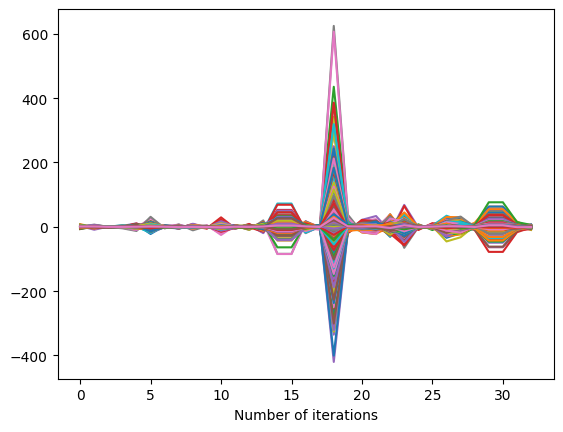

In [17]:
from scipy.linalg import lu
from scipy.linalg import solve

weights = np.insert(weights, 0, np.ones(217), 0)
c = []
for i in range(217, 250):
    pl, weights_contribution = lu(weights[0:i], permute_l=True)
    weights_contribution = np.nan_to_num(weights_contribution)
#     print(weights_contribution)
    out = solve(weights_contribution, np.ones(217))
    print(out)
    out = out/out[-9]
    c.append(out)
c = np.array(c)
c_T = c.T
ran = [i for i in range(len(c_T[0]))]
for i in range(len(c_T)):
    plt.plot(ran, c_T[i])
plt.xlabel("Number of iterations")
# plt.savefig('./Gold/expanded/{}_contribution_calculation_iteration.png'.format(name_prefix), dpi=300, bbox_inches='tight')


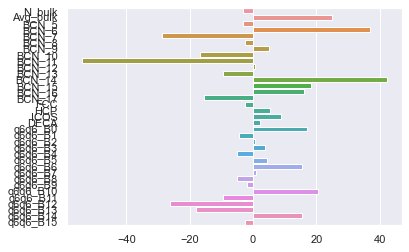

In [93]:
import seaborn as sns; sns.set()
sns.set(color_codes=True)
sns.set(font_scale=1)

sns.barplot(c[-1], feature_names)
plt.savefig('./Gold/{}_contribution_calculation.png'.format(name_prefix), dpi=300, bbox_inches='tight')


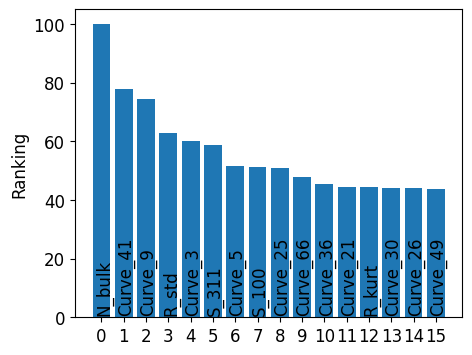

In [18]:
fig_FI_contribution_cal = plot_feature_importance(feature_names, c[-5], 15)


In [19]:
fig_FI_contribution_cal.savefig('./New_figures/expanded/{}_cc.png'.format(name_prefix), dpi=300, bbox_inches='tight')


In [ ]:
# Contribution calculation requries 

In [ ]:
# We find the contribution and coefficient relationship through previous method (benchmark)
weights_output = np.zeros(np.shape(weights))
X_data = []
y_data = []
contribution_set = np.round(contribution_set, 4)
for j in range(len(weights)):
    for i in range(len(X[-1])):
        array_aux = np.ones(np.shape(X))
        array_aux[:,i] = 1-weights[j][i]
#         banchmark
        con_feature = contribution_set[i][0]
        X_new = array_aux * X
        results_new = base_model.evaluate(X_new, y, batch_size=10)
        results_round = np.round(results_new[0],4)
#         the loss change to banchmark
        con = abs(24.7673-results_new[0])
#         weights_output[j][i] = con/con_feature
        
        weight = weights[j][i]
        print(con, weight)

        weights_output[j][i] = con/con_feature

#     break

In [20]:
fig_FI_gold_weights = feature_model.layers[1].weights[0].numpy()[0]
print(fig_FI_gold_weights)
fig_FI_gold_weights = np.subtract(fig_FI_gold_weights, 1)
fig_FI_gold_weights

[ 0.5446293   0.8764322  -0.4098497   0.11982936  0.5797961   1.2371464
 -0.01760024  0.26248124  0.8617725   0.53924763 -0.2762348   0.29842606
  1.0504353   0.53771746 -0.02169958  0.6351433   0.90923417  1.0880257
  0.54129946  0.678493    0.34117424  0.0148221  -0.39025164 -0.60637236
  0.6679672   0.24130516 -0.3477933   0.59055173  0.29962054  0.12336271
 -0.41855422  0.84672743  1.07851     0.781441    1.3717048 ]


array([-0.45537072, -0.12356782, -1.4098496 , -0.88017064, -0.42020392,
        0.23714638, -1.0176003 , -0.7375188 , -0.13822752, -0.46075237,
       -1.2762349 , -0.70157397,  0.0504353 , -0.46228254, -1.0216995 ,
       -0.36485672, -0.09076583,  0.08802569, -0.45870054, -0.32150698,
       -0.65882576, -0.9851779 , -1.3902516 , -1.6063724 , -0.3320328 ,
       -0.7586948 , -1.3477933 , -0.40944827, -0.7003795 , -0.8766373 ,
       -1.4185542 , -0.15327257,  0.07851005, -0.21855903,  0.37170482],
      dtype=float32)

In [103]:
base_model_weights = base_model.layers[0].weights[0].numpy()
base_model_weights = np.reshape(base_model_weights, (35))

In [67]:
X_features

,N_bulk,Avg_bulk,BCN_5,BCN_6,BCN_7,BCN_8,BCN_9,BCN_10,BCN_11,BCN_12,...,q6q6_B6,q6q6_B7,q6q6_B8,q6q6_B9,q6q6_B10,q6q6_B11,q6q6_B12,q6q6_B13,q6q6_B14,q6q6_B15
0,1014,12.5552,0,0,0,0,0,0,70,434,...,29,29,27,30,17,25,30,7,2,0
1,1034,12.4952,0,0,0,0,0,4,73,470,...,45,40,36,25,26,22,19,10,2,0
2,3365,12.3902,0,0,0,0,0,4,172,1898,...,150,168,212,224,236,281,959,247,21,0
3,5292,12.3027,0,0,1,0,2,35,191,3407,...,87,112,193,204,285,489,2775,732,117,0
4,8508,12.2159,0,0,0,2,9,56,357,5993,...,112,169,307,317,429,645,5029,982,136,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,950,11.8126,0,0,0,1,14,82,255,362,...,1,0,0,0,0,0,0,0,0,0
3996,1469,11.7971,0,0,0,1,22,124,411,552,...,1,0,1,1,0,0,0,0,0,0
3997,1905,11.7948,0,0,0,2,21,159,536,736,...,1,0,1,0,0,0,0,0,0,0
3998,2199,11.8058,0,0,0,1,26,217,584,801,...,1,2,1,1,0,0,0,0,0,0


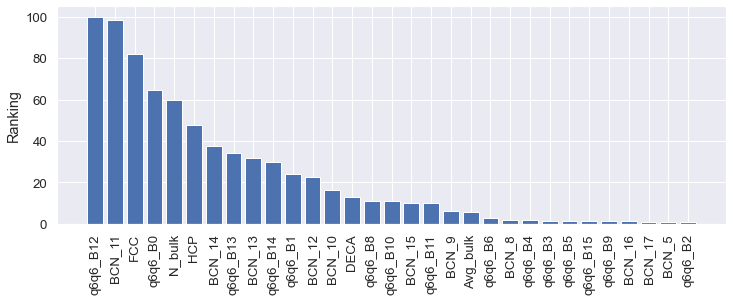

In [122]:
fig_FI_gold = utilities.plot_feature_importance(feature_set_bulk, base_model_weights)